# Graph Representation
* Graph is a data structure $\text {G = (V, E)}$: consist of $Vertices$ and $Edges$ 
* Can be either directed or undirected 

![graphs](https://i.ibb.co/1JrXZXb/graphs.png)

## Adjacencey List Representation

In [4]:
# for graph 1
graph1_vert = set(list(range(8)))
graph1_edges = {
    0: [1, 4],
    1: [0, 5],
    2: [5, 6],
    3: [7],
    4: [0],
    5: [1, 2, 6],
    6: [2, 5, 7],
    7: [3, 6]
}

# for graph 2
graph2_vert = set(list(range(6)))
graph2_edges = {
    0: [1, 3],
    1: [4],
    2: [4, 5],
    3: [1],
    4: [3],
    5: [5]
}

# Matrix Representation

In [5]:
import numpy as np

# get the number of vertices in the graph
num_vertices = len(graph1_edges)

# initialize an empty matrix of zeros
adj_matrix = np.zeros((num_vertices, num_vertices))

# iterate over each vertex and its neighbors to populate the matrix
for vertex, neighbors in graph1_edges.items():
    for neighbor in neighbors:
        adj_matrix[vertex][neighbor] = 1

# print the matrix
for row in adj_matrix:
    print(*row, sep=", ")
    

# or you can write it by hand "old way"

adj_matrix_old = [
    [0, 1, 0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 1, 0]
]

# print(adj_matrix_old)

0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0
1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0
0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0
1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0
0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0
0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0


# Draw Graphs

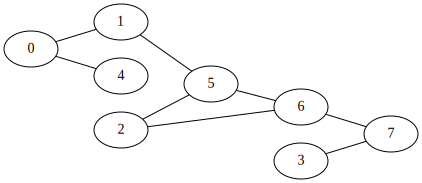

In [6]:
from graphviz import Digraph, Graph
'''
The function creates a new Digraph object using the Graphviz library and sets the format to SVG.
The direction of the edges is set to left-to-right using the rankdir attribute of the dot object.

the function loops through each vertex in the vertices argument and adds it as a node to the graph using the node method of the dot object.
The name parameter specifies the name of the node,
which is converted to a string using str(node). 
The label parameter specifies the label of the node, 
which is set to the same value as the name using an f-string (f"{node}").

the function loops through each key-value pair in the edges argument, 
where the key is a node and the value is a list of adjacent nodes. 
For each adjacent node in the list, 
the function adds an edge between the two nodes using the edge method of the dot object.

if there are multiple edges between the same two nodes,
only one of them will be added to the graph in the case of an undirected graph.

'''
def draw_graph(vertices, edges, directed):

    # Create a new Digraph
    if directed:
      dot = Digraph(format = 'svg')
    else:
      dot = Graph(format = 'svg')

    # Set the direction of the edges to Top-to-Bottom
    dot.attr(rankdir='LR')

    # Add nodes to the graph
    for node in vertices:
        dot.node(name= str(node), label= f"{node}")
    if not directed:
      #  keep track of edges that have already been added to the graph
      already_drawn = set()

    # Add edges to the graph
    for node, edge_list in edges.items():
        for edge in edge_list:
          if directed:
            dot.edge(str(node), str(edge))
          else:
            #  ensure that the order of nodes in the edge does not affect the comparison of edges
            sorted_edges = tuple(sorted([node, edge]))
            #  If the edge has not been added, it adds the edge to the graph using the dot.edge() method 
            # and adds the tuple to the already_drawn set
            if sorted_edges not in already_drawn:
              already_drawn.add(sorted_edges) 
              dot.edge(str(node), str(edge))

    # Render the graph to an SVG file and open it in the default viewer (optional)
    dot.render('graph', format='svg', view=True)
    return dot

draw_graph(graph1_vert, graph1_edges, False)


# Graph Traversal 
It is an algorithm (program) that is given: 
* a graph: $G$ 
* a distinguished source vertex: $s$.

The program ${\color{salmon} {Systematically}}$
 follows the edges of the graph so as to visit the vertices.

Today, we are exploring: 

* $\textbf{Breadth First Traversal}$: This systematically visits every vertex $v$ in the graph reachable from $s$, while identifying the shortest path from $s$ to $v$.

* $\textbf{Depth First Traversal}$: This systematically visits every vertex  $v$ in the graph reachable from  $s$ following the strategy: 
 1. explores edges out of the most recently discovered vertex $v$ 
 2. Once all of the edges of  $v$ have been explored, the search ${\color{green} {backtracks}}$ to explore other edges leaving the vertex from which $v$ was discovered. 

* $\textbf{Topological Sort}$: Specific only to DAGs (Directed acyclic Graphs), It visists all nodes reachable from s, so as to return a linear sorting of all its vertices such that if C contains an edge from u and v. Then it appears before in this ordering. 



## 1. Breadth First Traversal

In [7]:
from collections import deque
# from collections import stack

def bft(graph, start):
    # Create a queue for the nodes to be visited
    queue = deque([start])
    # Create a set to keep track of visited nodes
    visited = set()
    # Repeat until the queue is empty
    while queue:
        # Get the next node to visit
        node = queue.popleft()
        # If the node has not been visited, mark it as visited
        if node not in visited:
            visited.add(node)
            print(f"visiting: {node}")
            # Add all the neighbors of the node to the queue
            for neighbor in graph[node]:
                queue.append(neighbor)

bft(graph1_edges, 1)

visiting: 1
visiting: 0
visiting: 5
visiting: 4
visiting: 2
visiting: 6
visiting: 7
visiting: 3


## Depth First Search $"recursion"$

In [20]:
def DFS(graph, start):
    visited = set()

    def visit(node):
        if node in visited:
            return
        else:
            visited.add(node)
            neighbors = graph[node]
            print(f"Visited node: {node}")
            for neighbor in neighbors:
                visit(neighbor)

    for node in graph.keys():
        if node not in visited:
            print("New DFS search")
            visit(node)

DFS(graph1_edges, 0)

New DFS search
Visited node: 3
Visited node: 7
Visited node: 6
Visited node: 2
Visited node: 5
Visited node: 1
Visited node: 4
Visited node: 0


## Depth First Search $"iterative"$

In [9]:
# DFS using stack "iteratively"
graph_edges= {
    0: [3, 1],  # changed order from [1, 3] to [3, 1] to match order of DFS_recursion function that dr. mina wrote
    1: [4],
    2: [4, 5],
    3: [1],
    4: [3],
    5: [5]
}  

def DFS_it(graph):
    visited = set()

    for vertex in graph:
        if vertex not in visited:
            stack = [vertex]

            while stack:
                curr = stack.pop()
                if curr not in visited:
                    print(curr)
                    visited.add(curr)
                    for neighbor in graph[curr]:
                        if neighbor not in visited:
                            stack.append(neighbor)

# time complexity O(|V| + |E|), the function visits each vertex and each edge in the graph exactly once.

DFS_it(graph_edges)

0
1
4
3
2
5


## $\text  {Topological sort} $

In [19]:
# Is not unique
def topo_sort(graph, start):
    stack = []
    visited = set()

    def dfs(node):
        if node in visited:
            return
        visited.add(node)
        for neighbor in graph[node]:
            dfs(neighbor)
        stack.append(node)

    dfs(start)
    return stack[::-1]


result = topo_sort(graph1_edges, 0)
print("Topological Sort Order:", result)


Topological Sort Order: [0, 4, 1, 5, 2, 6, 7, 3]


# Extra

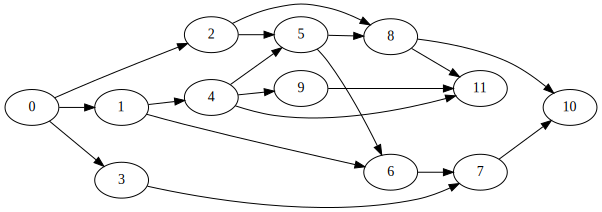

In [11]:
graph_3_vert = set(list(range(8)))
graph_3_edges = {
   0: [1, 2, 3],        # Vertex 0 has edges to vertices 1, 2, and 3
    1: [4, 6],           # Vertex 1 has edges to vertices 4 and 6
    2: [5, 8],           # Vertex 2 has edges to vertices 5 and 8
    3: [7],              # Vertex 3 has an edge to vertex 7
    4: [5, 9, 11],       # Vertex 4 has edges to vertices 5, 9, and 11
    5: [6, 8],           # Vertex 5 has edges to vertices 6 and 8
    6: [7],              # Vertex 6 has an edge to vertex 7
    7: [10],             # Vertex 7 has an edge to vertex 10
    8: [10, 11],         # Vertex 8 has edges to vertices 10 and 11
    9: [11],             # Vertex 9 has an edge to vertex 11
    10: [],              # Vertex 10 has no outgoing edges
    11: []               # Vertex 11 has no outgoing edges
}

draw_graph(graph_3_vert, graph_3_edges, True)

In [12]:
print("output of DFS on graph 3")
DFS(graph_3_edges, 0) 
print('*'*50)

print("output of BFT on graph 3")
bft(graph_3_edges, 0)
print('*'*50)

print("output of topt sort on graph 3")
result = topo_sort(graph_3_edges, 0)
print("Topological Sort Order:", result)
print('*'*50)

output of DFS on graph 3
New DFS search
Visited node: 10
Visited node: 7
Visited node: 6
Visited node: 11
Visited node: 8
Visited node: 5
Visited node: 9
Visited node: 4
Visited node: 1
Visited node: 2
Visited node: 3
Visited node: 0
**************************************************
output of BFT on graph 3
visiting: 0
visiting: 1
visiting: 2
visiting: 3
visiting: 4
visiting: 6
visiting: 5
visiting: 8
visiting: 7
visiting: 9
visiting: 11
visiting: 10
**************************************************
output of topt sort on graph 3
Topological Sort Order: [0, 3, 2, 1, 4, 9, 5, 8, 11, 6, 7, 10]
**************************************************
